In [1]:
import pandas as pd
import numpy as np

In [2]:
retail = pd.read_csv('D:\\karan data\\Data for Preprocessing\\retail_2016_2017.csv')

In [3]:
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [4]:
retail.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1054944 non-null  int64  
 1   date         1054944 non-null  object 
 2   store_nbr    1054944 non-null  int64  
 3   family       1054944 non-null  object 
 4   sales        1054944 non-null  float64
 5   onpromotion  1054944 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 167.8 MB


In [5]:
retail['date'] = pd.to_datetime(retail['date'], errors= 'coerce')

In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054944 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 48.3+ MB


In [7]:
retail['date'].dt.strftime('%Y-%b-%d').head()

0    2016-Jan-01
1    2016-Jan-01
2    2016-Jan-01
3    2016-Jan-01
4    2016-Jan-01
Name: date, dtype: object

In [8]:
retail.assign(date_format = retail['date'].dt.strftime('%b %d, %Y'),
              updated_date = retail['date'] + pd.DateOffset(days=5))

,id,date,store_nbr,family,sales,onpromotion,date_format,updated_date
0,1945944,2016-01-01,1,AUTOMOTIVE,0.000,0,"Jan 01, 2016",2016-01-06
1,1945945,2016-01-01,1,BABY CARE,0.000,0,"Jan 01, 2016",2016-01-06
2,1945946,2016-01-01,1,BEAUTY,0.000,0,"Jan 01, 2016",2016-01-06
3,1945947,2016-01-01,1,BEVERAGES,0.000,0,"Jan 01, 2016",2016-01-06
4,1945948,2016-01-01,1,BOOKS,0.000,0,"Jan 01, 2016",2016-01-06
...,...,...,...,...,...,...,...,...
1054939,3000883,2017-08-15,9,POULTRY,438.133,0,"Aug 15, 2017",2017-08-20
1054940,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,"Aug 15, 2017",2017-08-20
1054941,3000885,2017-08-15,9,PRODUCE,2419.729,148,"Aug 15, 2017",2017-08-20
1054942,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,"Aug 15, 2017",2017-08-20


In [9]:
updated_date = retail['date'] + pd.DateOffset(days=5)


In [10]:
retail['sales'].isnull().sum()

0

In [11]:
# retail['sales'] = np.where(retail['sales'] == 0, np.nan, retail['sales'])

In [12]:
retail['sales'].isnull().sum()

0

In [13]:
retail.fillna(retail['sales'].mean())

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.000,0
1,1945945,2016-01-01,1,BABY CARE,0.000,0
2,1945946,2016-01-01,1,BEAUTY,0.000,0
3,1945947,2016-01-01,1,BEVERAGES,0.000,0
4,1945948,2016-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
1054939,3000883,2017-08-15,9,POULTRY,438.133,0
1054940,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
1054941,3000885,2017-08-15,9,PRODUCE,2419.729,148
1054942,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [14]:
retail['sales'].bfill()  

0             0.000
1             0.000
2             0.000
3             0.000
4             0.000
             ...   
1054939     438.133
1054940     154.553
1054941    2419.729
1054942     121.000
1054943      16.000
Name: sales, Length: 1054944, dtype: float64

In [15]:
retail['sales'].ffill()

0             0.000
1             0.000
2             0.000
3             0.000
4             0.000
             ...   
1054939     438.133
1054940     154.553
1054941    2419.729
1054942     121.000
1054943      16.000
Name: sales, Length: 1054944, dtype: float64

In [16]:
retail_agg = retail.loc[:, ['date', 'sales']]

In [17]:
retail_agg

,date,sales
0,2016-01-01,0.000
1,2016-01-01,0.000
2,2016-01-01,0.000
3,2016-01-01,0.000
4,2016-01-01,0.000
...,...,...
1054939,2017-08-15,438.133
1054940,2017-08-15,154.553
1054941,2017-08-15,2419.729
1054942,2017-08-15,121.000


In [18]:
# retail['sales'] = np.where(retail['sales'] == 0, np.nan, retail['sales'])

In [19]:
retail_agg['sales'] = np.where(retail_agg['sales'] == 0, np.nan, retail_agg['sales'])

In [20]:
retail_agg.set_index('date', inplace=True)

In [21]:
retail_agg

,sales
date,
2016-01-01,NaN
2016-01-01,NaN
2016-01-01,NaN
2016-01-01,NaN
2016-01-01,NaN
...,...
2017-08-15,438.133
2017-08-15,154.553
2017-08-15,2419.729


In [22]:
retail_agg.ffill()

,sales
date,
2016-01-01,NaN
2016-01-01,NaN
2016-01-01,NaN
2016-01-01,NaN
2016-01-01,NaN
...,...
2017-08-15,438.133
2017-08-15,154.553
2017-08-15,2419.729


In [23]:
retail_agg.bfill()

,sales
date,
2016-01-01,4.000
2016-01-01,4.000
2016-01-01,4.000
2016-01-01,4.000
2016-01-01,4.000
...,...
2017-08-15,438.133
2017-08-15,154.553
2017-08-15,2419.729


In [24]:
retail_agg.fillna(retail_agg['sales'].mean()).iloc[:10,:]

,sales
date,
2016-01-01,552.494773
2016-01-01,552.494773
2016-01-01,552.494773
2016-01-01,552.494773
2016-01-01,552.494773
2016-01-01,552.494773
2016-01-01,552.494773
2016-01-01,552.494773
2016-01-01,552.494773


In [25]:
retail_agg.interpolate()

,sales
date,
2016-01-01,NaN
2016-01-01,NaN
2016-01-01,NaN
2016-01-01,NaN
2016-01-01,NaN
...,...
2017-08-15,438.133
2017-08-15,154.553
2017-08-15,2419.729


In [26]:
df = retail.loc[:, ['date', 'sales']].set_index('date')

In [27]:
df1 = df.groupby('date')[['sales']].sum().round(2).iloc[1:]


In [28]:
df1.assign(previous_day_sales = df1['sales'].shift(),
           Next_day = df1['sales'].shift(-1), 
           ratio = df1['sales']/df1['sales'].shift()
           )

,sales,previous_day_sales,Next_day,ratio
date,,,,
2016-01-02,1066677.42,NaN,1226735.72,NaN
2016-01-03,1226735.72,1066677.42,955956.88,1.150053
2016-01-04,955956.88,1226735.72,835320.44,0.779269
2016-01-05,835320.44,955956.88,821685.66,0.873806
2016-01-06,821685.66,835320.44,653504.37,0.983677
...,...,...,...,...
2017-08-11,826373.72,651386.91,792630.54,1.268637
2017-08-12,792630.54,826373.72,865639.68,0.959167
2017-08-13,865639.68,792630.54,760922.41,1.092110


In [29]:
df1.assign(
    difference = df1['sales'].diff(2)
)

,sales,difference
date,,
2016-01-02,1066677.42,NaN
2016-01-03,1226735.72,NaN
2016-01-04,955956.88,-110720.54
2016-01-05,835320.44,-391415.28
2016-01-06,821685.66,-134271.22
...,...,...
2017-08-11,826373.72,92234.05
2017-08-12,792630.54,141243.63
2017-08-13,865639.68,39265.96


In [30]:
retail

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.000,0
1,1945945,2016-01-01,1,BABY CARE,0.000,0
2,1945946,2016-01-01,1,BEAUTY,0.000,0
3,1945947,2016-01-01,1,BEVERAGES,0.000,0
4,1945948,2016-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
1054939,3000883,2017-08-15,9,POULTRY,438.133,0
1054940,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
1054941,3000885,2017-08-15,9,PRODUCE,2419.729,148
1054942,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [35]:
retail_agg.fillna(retail_agg['sales'].mean(), inplace=True)

<Axes: xlabel='date'>

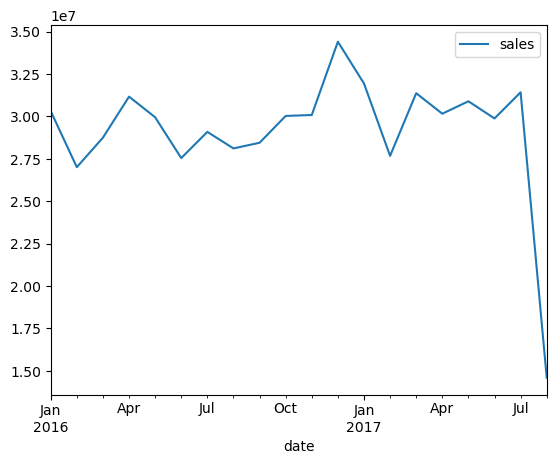

In [40]:
retail_agg.resample('M').sum().round(2).plot()

In [39]:
retail_agg.resample('Q').sum().round(2)

,sales
date,
2016-03-31,86071623.59
2016-06-30,88665179.77
2016-09-30,85651588.48
2016-12-31,94522409.23
2017-03-31,90988043.36
2017-06-30,90938237.59
2017-09-30,46013963.35


(array([16861., 16922., 16983., 17045., 17106., 17167., 17226., 17287.,
        17348., 17410.]),
 [Text(16861.0, 0, '2016-03'),
  Text(16922.0, 0, '2016-05'),
  Text(16983.0, 0, '2016-07'),
  Text(17045.0, 0, '2016-09'),
  Text(17106.0, 0, '2016-11'),
  Text(17167.0, 0, '2017-01'),
  Text(17226.0, 0, '2017-03'),
  Text(17287.0, 0, '2017-05'),
  Text(17348.0, 0, '2017-07'),
  Text(17410.0, 0, '2017-09')])

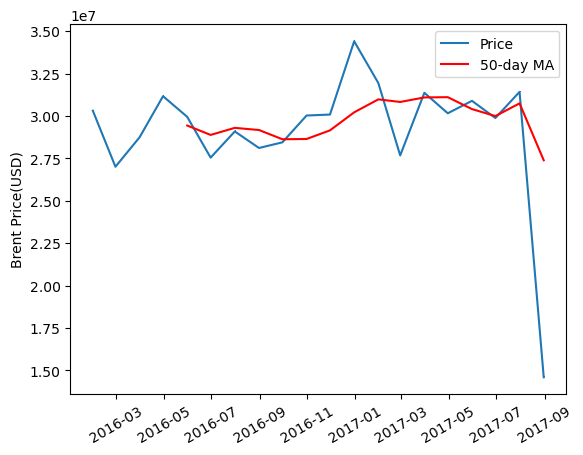

In [67]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

ax.plot(Month_retail_agg, marker = ',', label = 'Price')
ax.plot(Month_retail_agg.rolling(5).mean(), color = 'red', label = '50-day MA')
ax.legend()
ax.set_ylabel('Brent Price(USD)')
plt.xticks(rotation=30) 

In [45]:
Month_retail_agg = retail_agg.resample('M').sum().round(2)

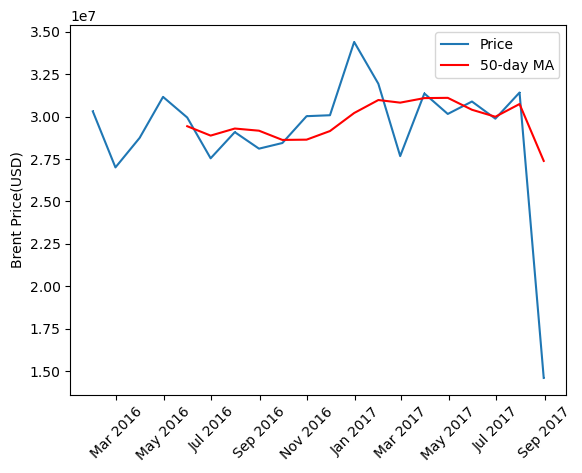

In [63]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

# Assuming Month_retail_agg has a DatetimeIndex, otherwise, convert it
Month_retail_agg.index = pd.to_datetime(Month_retail_agg.index)

fig, ax = plt.subplots()

ax.plot(Month_retail_agg, marker=',', label='Price')
ax.plot(Month_retail_agg.rolling(5).mean(), color='red', label='50-day MA')
ax.legend()
ax.set_ylabel('Brent Price(USD)')

# Set x-axis formatting
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Month and year format
plt.xticks(rotation=45)  # Rotate the tick labels for better visibility

plt.show()


In [62]:
Month_retail_agg.idxmax

<bound method DataFrame.idxmax of                   sales
date                   
2016-01-31  30313262.44
2016-02-29  27008260.92
2016-03-31  28750100.23
2016-04-30  31168078.35
2016-05-31  29951335.83
2016-06-30  27545765.59
2016-07-31  29089831.69
2016-08-31  28114380.75
2016-09-30  28447376.05
2016-10-31  30029378.06
2016-11-30  30085818.70
2016-12-31  34407212.48
2017-01-31  31943164.31
2017-02-28  27675043.01
2017-03-31  31369836.05
2017-04-30  30161120.63
2017-05-31  30894782.07
2017-06-30  29882334.89
2017-07-31  31424253.31
2017-08-31  14589710.04>